# Installation

In [1]:
!pip install praw

# Importing and Collecting Data

In [2]:
import praw # Importing Praw 
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" 
reddit = praw.Reddit( client_id="ItljJS-EvRTfer-u8wPRug",
                     client_secret="mCiLfac0NlLQVOof9rf75y6xR7DGmg",
                     user_agent=user_agent ) # The keys are collected from the reddit developer platform

In [3]:
import pandas as pd # Importing pandas
import numpy as np  # Importing numpy
import re #RegEx : Regular expression

# Execution of Code with a instance

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("ukraine").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

7:12 EET; The Sun is Rising Over Kyiv on the 721st Day of the Full-Scale Invasion. Today, the dreamy art of Halyna Zubchenko.
1aqcqiy
duellingislands
1707880208.0
156
0.99
https://www.reddit.com/r/ukraine/comments/1aqcqiy/712_eet_the_sun_is_rising_over_kyiv_on_the_721st/
0


# Get Total comments in Reddit 

In [5]:
headlines = set()
for submission in reddit.subreddit("ukraine").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

803


# DataFrame

In [6]:
#Create a dataframe from the scrapped data 
ukraine_df = pd.DataFrame(headlines)
ukraine_df.head()

,0
0,Ukrainian Strikes May Have Hindered Lancet Dro...
1,"Hello, Reddit. We now at Donbas. Delivered som..."
2,Ukraine’s army chief: The design of war has ch...
3,Zelensky asks parliament to prolong martial la...
4,Ukraine Aid Operations - Another highly critic...


In [7]:
ukraine_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
ukraine_df.columns = ['Titles'] # Printing the column names

In [9]:
ukraine_df.head() #Printing the head of dataframe

,Titles
0,Ukrainian Strikes May Have Hindered Lancet Dro...
1,"Hello, Reddit. We now at Donbas. Delivered som..."
2,Ukraine’s army chief: The design of war has ch...
3,Zelensky asks parliament to prolong martial la...
4,Ukraine Aid Operations - Another highly critic...


In [10]:
ukraine_df.Titles.duplicated().sum()  # Making the duplicates sum to zero

0

# Cleaning the tweets

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
ukraine_df["Titles"]= ukraine_df["Titles"].apply(cleanTxt)

#Show the clean text
ukraine_df.head()

,Titles
0,Ukrainian Strikes May Have Hindered Lancet Dro...
1,"Hello, Reddit. We now at Donbas. Delivered som..."
2,Ukraine’s army chief The design of war has cha...
3,Zelensky asks parliament to prolong martial la...
4,Ukraine Aid Operations - Another highly critic...


In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
ukraine_df["Titles"]= ukraine_df["Titles"].apply(remove_emoji)

#Show the clean text
ukraine_df.head()

,Titles
0,Ukrainian Strikes May Have Hindered Lancet Dro...
1,"Hello, Reddit. We now at Donbas. Delivered som..."
2,Ukraine’s army chief The design of war has cha...
3,Zelensky asks parliament to prolong martial la...
4,Ukraine Aid Operations - Another highly critic...


In [13]:
!pip install textblob #Installation of textblob

ERROR: Invalid requirement: '#Installation'


In [14]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS # Importing the installed packages

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
ukraine_df['Subjectivity'] = ukraine_df['Titles'].apply(getSubjectivity)
ukraine_df['Polarity'] = ukraine_df['Titles'].apply(getPolarity)

#Now display data
ukraine_df.head()

,Titles,Subjectivity,Polarity
0,Ukrainian Strikes May Have Hindered Lancet Dro...,0.100000,-0.200000
1,"Hello, Reddit. We now at Donbas. Delivered som...",0.750000,0.510000
2,Ukraine’s army chief The design of war has cha...,0.000000,0.000000
3,Zelensky asks parliament to prolong martial la...,0.000000,0.000000
4,Ukraine Aid Operations - Another highly critic...,0.685714,0.223214


In [16]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
ukraine_df["Insight"] = ukraine_df["Polarity"].apply(getInsight)

ukraine_df.head(50) # Printing the data of 50 entries

,Titles,Subjectivity,Polarity,Insight
0,Ukrainian Strikes May Have Hindered Lancet Dro...,0.100000,-0.200000,Negative
1,"Hello, Reddit. We now at Donbas. Delivered som...",0.750000,0.510000,Positive
2,Ukraine’s army chief The design of war has cha...,0.000000,0.000000,Neutral
3,Zelensky asks parliament to prolong martial la...,0.000000,0.000000,Neutral
4,Ukraine Aid Operations - Another highly critic...,0.685714,0.223214,Positive
5,Japan handed over modern equipment to Ukrainia...,0.133333,0.033333,Positive
6,Occupation forces shelled Bilozerka (Kherson) ...,0.675000,0.025000,Positive
7,(a little video of) Ukrainian air-launched cru...,0.120000,-0.137500,Negative
8,"Zelensky dismisses Chief Commander Zaluzhnyi, ...",0.000000,0.000000,Neutral
9,Ukraine's grain corridor how much cargo has be...,0.350000,0.350000,Positive


# Data Visualization

In [17]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Bar-Plot

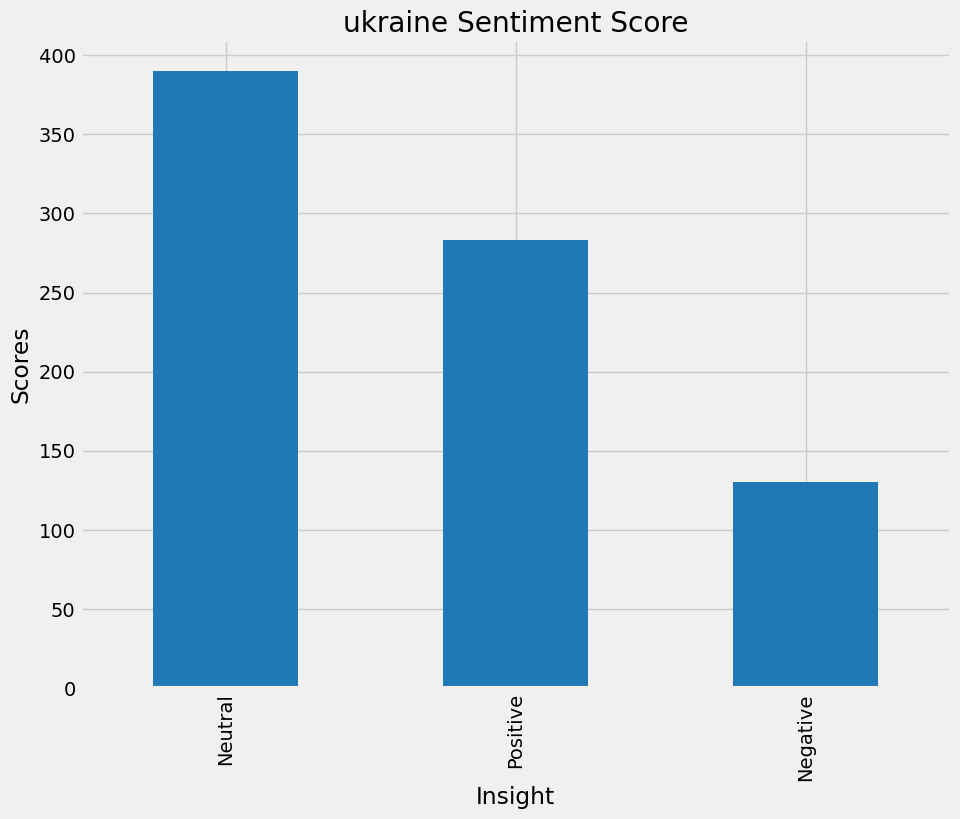

In [19]:
#Plot the values count of sentiment
plt.title("ukraine Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
ukraine_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# WordCloud

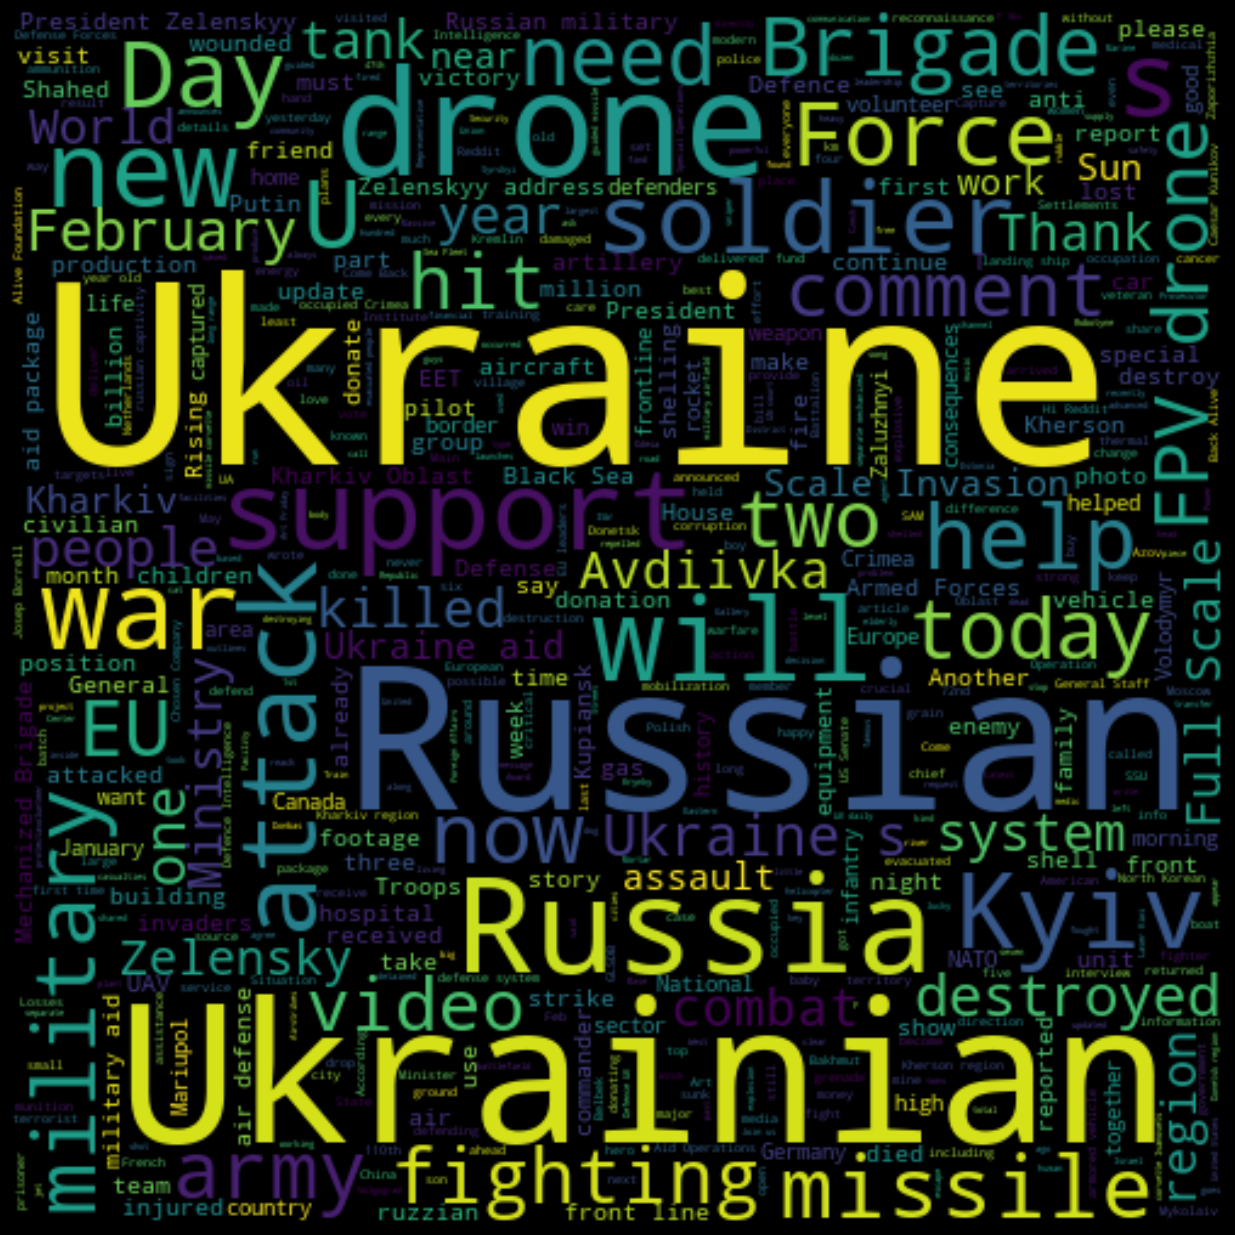

In [35]:
text = ' '.join( [twts for twts in ukraine_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=500, height = 500,
                      
                      max_words = 1000,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,15), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");